In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

In [3]:
import pyplotdesigner as ppd

# example using simple constraints

ValueError: Width and height specified must be non-negative

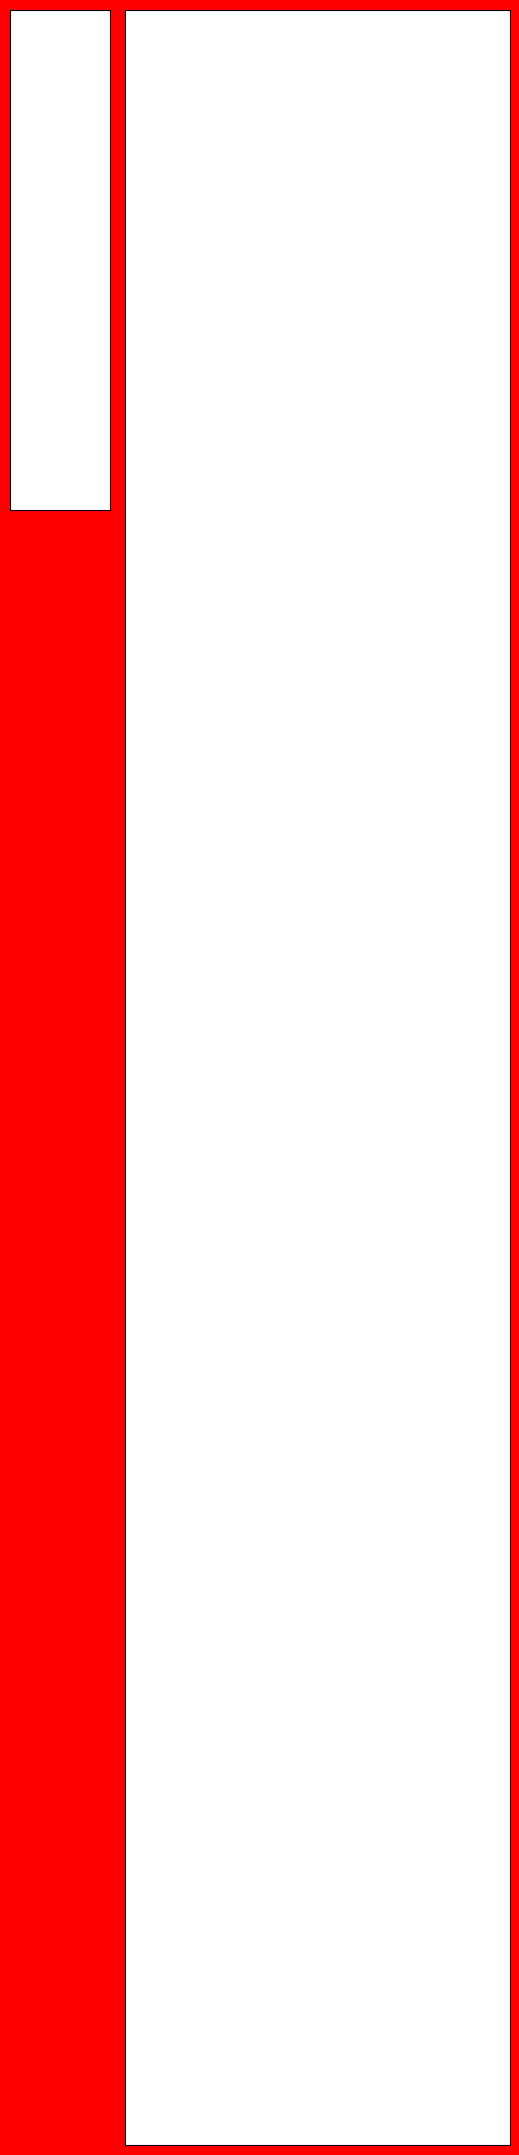

In [4]:
axis_spacing = 0.15
margin = 0.5

pd = ppd.PlotDescription(6, 6)

# add three axes
ax1 = pd.add_axis(0, 0, 1, 1)
ax2 = pd.add_axis(0, 0, 1, 1)
ax3 = pd.add_axis(0, 0, 1, 1)

# align left plot
pd.add_constraint(None, ax1, 'w', 'w', 'move separation', margin)

# align to north boundary
pd.add_constraint(None, [ax1, ax2], 'n', 'n', 'move separation', -margin)
# set margins
pd.add_constraint(ax1, [ax2, ax3], 'e', 'w', 'move separation', axis_spacing)

# resize remaining degrees of freedom to respect desired separations
pd.add_constraint(None, [ax1, ax3], 's', 's', 'resize separation', margin)
pd.add_constraint(None, [ax2, ax3], 'e', 'e', 'resize separation', -margin)

# force two right plots to obey given aspect ratio in heights
pd.add_constraint(ax2, ax3, 'w', 'w', 'resize duplicate', 2.0)

# notice that this call will *resize* ax2, which means ax3 loses its duplicate
# relationship with ax2!
pd.add_constraint(ax3, ax2, 'n', 's', 'resize separation', axis_spacing)

# apply constraints and make image of layout
pd.apply_constraints()
fig = pd.get_matplotlib_figure(facecolor='r')
fig.savefig('detailed-simple.png')

In [ ]:
print(pd)
print('\nAxes:')
pprint(pd.axes)
print('\nConstraints:')
pprint(pd.constraints)

# more complicated layout

In [ ]:
# margins
margin_left = 1.5
margin_bottom = 1.0
margin_right = 0.5
margin_interplot = 0.2
margin_plotgroup = 0.5

# create plot description
pd = ppd.PlotDescription(8, 8)

# axis index row|column
ax11 = pd.add_axis(0, 0, 1, 1)
ax12 = pd.add_axis(0, 0, 1, 1)
ax13 = pd.add_axis(0, 0, 1, 1)

ax21 = pd.add_axis(0, 0, 1, 1)
ax22 = pd.add_axis(0, 0, 1, 1)

ax31 = pd.add_axis(0, 0, 1, 1)
ax32 = pd.add_axis(0, 0, 1, 1)

# set left edge
pd.add_constraint(None, [ax11, ax21, ax31], 'w', 'w', 'move separation', margin_left)

# set up first row
pd.add_constraint(None, [ax11, ax12, ax13], 'n', 'n', 'move separation', -margin_interplot)
pd.add_constraint(ax11, ax12, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(ax12, ax13, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(None, ax13, 'e', 'e', 'resize separation', -margin_right)
pd.add_constraint(ax11, [ax12, ax13], 'w', 'w', 'duplicate', 1.0)
pd.add_constraint(ax11, [ax12, ax13], 'n', 'n', 'equalize', 0.5)

# set second row
pd.add_constraint(ax11, [ax21, ax22], 's', 'n', 'move separation', -margin_interplot)
pd.add_constraint(ax11, ax21, 'w', 'w', 'move separation', 0)
pd.add_constraint(ax12, ax21, 'e', 'e', 'resize separation', 0)
pd.add_constraint(ax13, ax22, 'w', 'w', 'move separation', 0)
pd.add_constraint(ax13, ax22, 'e', 'e', 'resize separation', 0)
pd.add_constraint(ax21, ax22, 'w', 'w', 'duplicate', 1.0)

# set third row
pd.add_constraint(ax21, [ax31, ax32], 's', 'n', 'move separation', -margin_plotgroup)
pd.add_constraint(ax31, ax32, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(None, ax32, 'e', 'e', 'resize separation', -margin_right)
pd.add_constraint(None, [ax31, ax32], 's', 's', 'resize separation', margin_bottom)
pd.add_constraint(ax31, ax32, 'w', 'w', 'duplicate', 1.0)
pd.add_constraint(ax31, ax32, 'n', 'n', 'equalize', 1.0)

# set row heights
pd.add_constraint(ax11, ax21, 'w', 'w', 'equalize', 1.0)
pd.add_constraint(ax11, ax31, 'w', 'w', 'equalize', 2.0)

# apply constraints and make image of layout
pd.apply_constraints()
fig = pd.get_matplotlib_figure(facecolor='b')
fig.savefig('detailed-complicated.png')

In [ ]:
print(pd)
print('\nAxes:')
pprint(pd.axes)
print('\nConstraints:')
pprint(pd.constraints)